In [1]:
import numpy as np
from imutils import paths
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from google.colab import drive
import zipfile
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from PIL import Image
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/dataset/dataset.zip'
zip_ref   = zipfile.ZipFile(path, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
dataset_path = '/content/dataset'
imagePaths = paths.list_images(dataset_path)
data = []
labels = []

In [5]:
for imagepath in imagePaths:
  image = Image.open(imagepath).convert('RGB')
  image = np.array(image.resize((224, 224))) / 255.0
  data.append(image)

  label = imagepath.split(os.path.sep)[-2]
  labels.append(label)

In [6]:
print(labels)

['bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika_ambon', 'bika

In [7]:
labels_train_unique = np.unique(np.array(labels))

In [8]:
food = {}

for i in range(len(labels_train_unique)):
  food[labels_train_unique[i]] = i
food

{'Gulai_ayam': 0,
 'Kerak_telor': 1,
 'Soto_Ayam': 2,
 'bika_ambon': 3,
 'gudeg': 4,
 'klepon': 5,
 'martabak': 6,
 'nasi_tumpeng': 7,
 'pecel': 8,
 'pempek': 9,
 'rawon': 10,
 'rendang': 11,
 'sate': 12,
 'serabi': 13,
 'tahu_gejrot': 14}

In [9]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels[0:3])

[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]]


In [10]:
(X_train, X_test, Y_train, Y_test) = train_test_split(np.array(data), np.array(labels), test_size=0.3, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1876, 224, 224, 3)
(805, 224, 224, 3)
(1876, 15)
(805, 15)


In [11]:
import tensorflow_hub as hub
import matplotlib.pylab as plt

In [12]:
mobilenet = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'

In [13]:
mobilenet_layers = hub.KerasLayer(mobilenet, input_shape=(224,224,3))

In [14]:
mobilenet_layers.trainable = False

In [15]:
model=tf.keras.models.Sequential([
    mobilenet_layers,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dropout (Dropout)           (None, 1001)              0         
                                                                 
 dense (Dense)               (None, 128)               128256    
                                                                 
 dense_1 (Dense)             (None, 15)                1935      
                                                                 
Total params: 3,670,456
Trainable params: 130,191
Non-trainable params: 3,540,265
_________________________________________________________________


In [17]:
from tensorflow.keras.optimizers import Adam
optimizers=Adam(learning_rate=0.0001)
model.compile(optimizer = optimizers,
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
history= model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)

Epoch 1/10
59/59 [==============================] - 20s 108ms/step - loss: 3.2314 - accuracy: 0.1461 - val_loss: 2.1268 - val_accuracy: 0.3193
Epoch 2/10
59/59 [==============================] - 4s 60ms/step - loss: 1.9804 - accuracy: 0.3811 - val_loss: 1.4862 - val_accuracy: 0.5565
Epoch 3/10
59/59 [==============================] - 4s 60ms/step - loss: 1.4297 - accuracy: 0.5544 - val_loss: 1.1159 - val_accuracy: 0.6882
Epoch 4/10
59/59 [==============================] - 4s 60ms/step - loss: 1.1045 - accuracy: 0.6530 - val_loss: 0.9034 - val_accuracy: 0.7429
Epoch 5/10
59/59 [==============================] - 4s 60ms/step - loss: 0.8889 - accuracy: 0.7281 - val_loss: 0.7786 - val_accuracy: 0.7677
Epoch 6/10
59/59 [==============================] - 4s 67ms/step - loss: 0.7437 - accuracy: 0.7788 - val_loss: 0.6817 - val_accuracy: 0.7963
Epoch 7/10
59/59 [==============================] - 4s 64ms/step - loss: 0.6326 - accuracy: 0.8097 - val_loss: 0.6246 - val_accuracy: 0.8124
Epoch 8/10


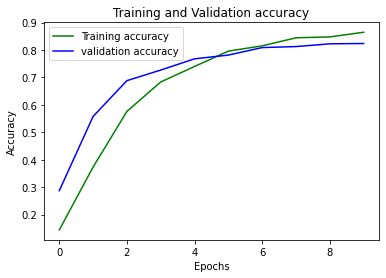

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(10)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

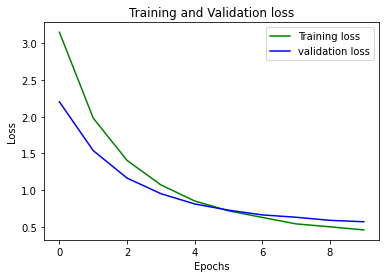

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(10)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.4588209390640259
Test accuracy: 0.8496894240379333


In [19]:
pred = model.predict(X_test)

In [ ]:
pred.shape

(805, 15)

In [30]:
pred[212]

array([4.3595936e-03, 3.6251189e-05, 1.2428418e-04, 2.6721998e-05,
       3.3670757e-04, 1.6183084e-06, 1.8049749e-04, 7.9446727e-05,
       7.6101355e-06, 5.6289531e-02, 1.9806082e-04, 2.1307622e-05,
       3.2244259e-04, 9.1008533e-06, 9.3800682e-01], dtype=float32)

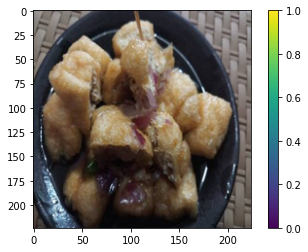

In [31]:
plt.figure()
plt.imshow(X_test[212])
plt.colorbar()
plt.show()

In [ ]:
food

{'Gulai_ayam': 0,
 'Kerak_telor': 1,
 'Soto_Ayam': 2,
 'bika_ambon': 3,
 'gudeg': 4,
 'klepon': 5,
 'martabak': 6,
 'nasi_tumpeng': 7,
 'pecel': 8,
 'pempek': 9,
 'rawon': 10,
 'rendang': 11,
 'sate': 12,
 'serabi': 13,
 'tahu_gejrot': 14}

# Testing images

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving resep-gulai-ayam-rumah-makan-padang_43.jpeg to resep-gulai-ayam-rumah-makan-padang_43.jpeg


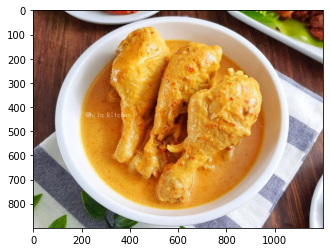

In [ ]:
image_testing = Image.open('/content/resep-gulai-ayam-rumah-makan-padang_43.jpeg')
plt.imshow(image_testing)
plt.show()

In [ ]:
image_testing=np.array(image_testing.resize((224,224))) / 255.0
image_testing.shape

(224, 224, 3)

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 224, 224, 3)


In [ ]:
output = model.predict(image_testing, 1)
print(output)

[[9.9697173e-01 1.5139961e-04 9.8445534e-04 1.5922356e-04 4.2831645e-05
  5.9355784e-06 2.0602683e-04 2.4582190e-05 7.7229786e-05 4.8290973e-04
  9.8692719e-05 4.3876436e-05 1.6982542e-04 2.4503513e-04 3.3612695e-04]]


In [ ]:
print(output.max())

0.9969717


In [ ]:
test_image_path = '/content/resep-gulai-ayam-rumah-makan-padang_43.jpeg'

In [ ]:
model.save('FOODRISM.model', save_format='h5')

In [ ]:
print(os.path.realpath(X_test))

TypeError: ignored

In [ ]:
fig, axs= plt.subplots(2,2, figsize=[10,10])
fig.subplots_adjust(hspace=.01)


count=0
for i in range(2):    
    for j in range(2):  
        
        img = cv2.imread(path_test[count])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        img = cv2.resize(img, (250,200))
        result = np.argsort(pred[count])[::-1]
        
        i_max = -1
        max_val = ""
        for (k,val) in enumerate(food.keys()):
            
            if(pred[count][k] > i_max):
                i_max = pred[count][k]
                max_val = val
        
        txt = str(max_val) + " with Probability "+ str("{:.4}%".format(i_max*100)) + " %"
            
        
        axs[i][j].imshow(img)
        axs[i][j].set_title(txt)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("All predictions are shown in title", fontsize = 18)        
plt.show()